# Crash Course in Causality: Analyzing IMDb Data for Insights¶

Name: Rasika Pushparaj Kole NUID: 002620332

## Objective

This notebook aims to explore causal relationships in the entertainment industry using IMDb datasets. By focusing on essential data preparation techniques and causal inference methodologies, we will analyze the impact of various factors such as genre, runtime, and release year on movie ratings.

## Abstract

This notebook explores the application of causal inference techniques to analyze factors influencing IMDb movie ratings. By combining effective data preparation, exploratory data analysis, and causal modeling, we aim to uncover how variables such as genre, runtime, and release year impact audience ratings. The analysis leverages IMDb datasets (title.basics.tsv.gz and title.ratings.tsv.gz) to demonstrate the importance of causal inference in drawing meaningful conclusions from data.

Through this work, readers will gain insights into:

The distinction between correlation and causation.
Key techniques for preparing and cleaning large datasets.
Methods for building and interpreting causal models.
This book serves as a practical guide for using causality to derive actionable insights from real-world data.

## Causality
Causality is the study of cause-and-effect relationships, aiming to understand how one variable influences another. Unlike correlation, which measures statistical association, causality provides a deeper understanding of underlying mechanisms and relationships.

### Why is Causality Important?
In data science and machine learning, causality is crucial for:
1. Making informed decisions (e.g., identifying factors that drive high ratings for movies).
2. Building robust predictive models that generalize beyond observed data.
3. Preventing misleading conclusions from spurious correlations.

### Examples of Causality vs. Correlation
- **Correlation**: Higher movie budgets are associated with higher ratings.
- **Causation**: Higher budgets lead to better ratings due to higher production quality.

### Causal Framework
To identify causality, a systematic approach is required:
1. **Define the Problem**: Specify the variables and their hypothesized relationships.
2. **Data Preparation**: Clean and preprocess data to address missing values, outliers, and biases.
3. **Exploratory Data Analysis**: Examine trends, distributions, and potential causal variables.
4. **Causal Modeling**: Apply methods like causal graphs, propensity score matching, and regression analysis.

### Key Formula: Confounding Adjustment
One common method to address confounding variables (variables influencing both the cause and effect):

$$
E[Y|X] = E[Y|X, C]
$$

Where:
- \(Y\): Outcome variable (e.g., movie rating).
- \(X\): Causal variable of interest (e.g., genre).
- \(C\): Confounding variable(s) (e.g., budget, runtime).

This formula ensures we isolate the effect of \(X\) on \(Y\) by accounting for the confounders.

### Causal Graph Representation
A Directed Acyclic Graph (DAG) visually represents causal relationships:
- **Nodes**: Variables (e.g., genre, rating, budget).
- **Edges**: Arrows indicating causal direction.

For example:
Budget → Genre → Rating


This shows that budget impacts genre selection, which in turn affects ratings.

Applications in IMDb Analysis

Investigating how genre affects ratings while controlling for confounders like runtime.
Understanding the impact of release year on audience preferences.

## Methods for Investigating Causality

Causality analysis is crucial for understanding the effect of one variable on another. To infer causal relationships from observational data, we employ several techniques combining statistical methods and domain knowledge. Below, we outline the foundational methods for investigating causality.

---

### 1. Directed Acyclic Graphs (DAGs)

![A DAG illustrating potential causal relationships and confounding effects between variables](diagram-DAG.webp)

Directed Acyclic Graphs (DAGs) are visual tools used to represent and understand causal relationships between variables in a dataset. They are particularly valuable in identifying potential confounders, mediators, and causal paths, providing a structured approach to causal inference.



**Nodes and Edges**:
- In a DAG, variables are represented as **nodes**, and causal relationships between them are represented as **directed edges** (arrows).
- The direction of the arrow indicates the causal flow (e.g., `Budget → Genre` suggests that budget impacts the genre).


**Acyclic Nature**:
- The graph is **acyclic**, meaning it does not contain loops or cycles.
- This ensures that a variable cannot directly or indirectly cause itself.


**Identification of Confounders**:
- A **confounder** is a variable that influences both the cause and the effect, creating a spurious association.
- DAGs help identify such confounders, allowing researchers to control for them in their analysis.


**Applications in IMDb Data**:
- **Example**: For IMDb, a DAG might show how `Budget` affects both `Genre` and `AverageRating`, highlighting the need to control for `Budget` when studying the causal impact of `Genre` on `AverageRating`.



DAGs are a powerful visual representation of causal relationships. They help identify:
- Potential confounders.
- Mediators (variables on the causal pathway).
- Effect modifiers.

**Strengths:**
- Helps visualize and understand the relationships between variables.
- Identifies confounders, mediators, and causal pathways.
- Guides statistical adjustments needed for accurate causal inference.

**Limitations:**
- Requires domain expertise to construct an accurate DAG.
- Cannot establish causation without additional data or methods.
- Can become complex for datasets with a large number of variables.

#### How They Work:
- **Nodes**: Represent variables (e.g., `Genre`, `Rating`).
- **Edges**: Represent directional causal relationships (e.g., `Budget → Genre`).

**Example DAG:**

Budget → Genre → Rating ↘ Rating

This shows that budget influences both genre and rating directly, with an indirect pathway through genre.

---

### 2. Backdoor Criterion

![Visualizing the backdoor adjustment to block confounding pathways in causal analysis](Backdoor_Criterion.png)

To identify causal effects, we must block the influence of confounders. The backdoor criterion ensures that confounding variables do not bias the relationship between the treatment (\(X\)) and outcome (\(Y\)).

#### Steps to Apply:
1. Identify confounders using a DAG.
2. Control for confounders via:
   - Regression
   - Propensity Score Matching (PSM)
   - Stratification

### Formula:
$$
P(Y|do(X)) = \sum_{C} P(Y|X, C)P(C)
$$

Where:
- \(do(X)\): Intervention on \(X\).
- \(C\): Confounding variable(s).

Strengths:
- Provides a systematic approach to blocking confounders and isolating causal effects.
- Can be used with DAGs to adjust for indirect confounding paths.
- Ensures unbiased estimation of causal effects if the assumptions hold.

Limitations:
- Relies heavily on the assumption that all confounders are observed.
- Misidentifying confounders can lead to biased results.
- Requires appropriate statistical techniques (e.g., stratification, regression) to control for confounders.

---

### 3. Propensity Score Matching (PSM)

![Illustration of Propensity Score Matching, where individuals are matched based on their likelihood of receiving treatment](Propensity_score_matching.jpeg)

Propensity Score Matching (PSM) is a statistical technique used to reduce selection bias in observational studies by matching units (e.g., movies) with similar characteristics (covariates). This method mimics randomized controlled trials by balancing the covariates between treated and control groups.
In other words, PSM matches treated and untreated groups based on similar propensity scores, balancing confounders to mimic a randomized experiment.


**Key Concepts**:
1. **Propensity Score**:
   - The propensity score is the probability of a unit receiving the treatment (e.g., being classified as a specific genre) based on its observed characteristics (e.g., `Budget`, `Runtime`).

2. **Matching**:
   - Treated units (e.g., Action movies) are matched with control units (e.g., Drama movies) that have similar propensity scores.
   - This ensures that comparisons are made between units that are similar in terms of covariates.

3. **Covariate Balancing**:
   - PSM ensures that covariates are balanced between treated and control groups, isolating the causal effect of the treatment.


**Steps for PSM**:
1. Calculate the propensity scores using a logistic regression model.
2. Match treated and control units based on their propensity scores.
3. Compare outcomes (e.g., `AverageRating`) between matched groups to estimate the causal effect.


**Applications in IMDb Data**:
- **Scenario**:
  - Goal: Estimate the causal effect of `Genre` on `AverageRating`.
  - Covariates: Control for variables like `Budget` and `Runtime`.
  - Example: Match Action movies (treated) with Drama movies (control) based on `Budget` and `Runtime`.


**Code Example**:
```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Binary treatment: Action vs. Drama
imdb_dataset['is_action'] = imdb_dataset['genres'].apply(lambda g: 1 if 'Action' in g else 0)

# Covariates: Budget and Runtime
X = imdb_dataset[['runtimeMinutes', 'budget']].dropna()
y = imdb_dataset['is_action']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression to estimate propensity scores
model = LogisticRegression()
model.fit(X_train, y_train)

# Add propensity scores to the dataset
imdb_dataset['propensity_score'] = model.predict_proba(X)[:, 1]

# Display matched samples
print(imdb_dataset[['genres', 'runtimeMinutes', 'budget', 'propensity_score']].head())



#### Steps to Apply:
1. Estimate the propensity score (\(P(Treatment|Covariates)\)) using logistic regression.
2. Match treated and untreated units with similar scores.
3. Compare outcomes across matched groups.

Strengths:
- Balances observed confounders between treatment and control groups, mimicking a randomized experiment.
- Useful for observational studies where randomization isn’t possible.
- Simplifies causal effect estimation by ensuring comparability between groups.

Limitations:
- Only accounts for observed confounders; unobserved confounders remain a problem.
- Matching quality depends on the dataset and the propensity score model.
- Reduces sample size, which may lower statistical power.

---

### 4. Instrumental Variables (IV)

An IV is a variable that:
- Affects the treatment but has no direct effect on the outcome.
- Breaks the confounding pathway.

#### Example:
- **IV**: Genre popularity trends.
- **Treatment**: Genre of a movie.
- **Outcome**: IMDb ratings.

#### Key Formula:
$$
\beta = \frac{Cov(Z, Y)}{Cov(Z, X)}
$$
Where 

\(Z\) is the instrument

---

### 5. Difference-in-Differences (DiD)

![A graphical representation of the Difference-in-Differences approach to estimating causal effects](Difference.jpg)

Difference-in-Differences (DiD) is a quasi-experimental method used to estimate causal effects by comparing changes in outcomes over time between treated and control groups. It is particularly effective for evaluating the impact of interventions or events when randomization is not possible.


**Key Concepts**:
1. **Pre- and Post-Periods**:
   - Divide the data into periods before and after the intervention (e.g., pre-2010 and post-2010 for the rise of streaming platforms).

2. **Treated and Control Groups**:
   - The treated group is affected by the intervention (e.g., genres like Action that benefited more post-streaming).
   - The control group is unaffected by the intervention (e.g., older genres like Drama).

3. **Difference Calculation**:
   - Compare the changes in the treated group with the changes in the control group over time.


**Applications in IMDb Data**:
- **Scenario**:
  - Goal: Estimate the causal effect of the streaming era (post-2010) on `AverageRating`.
  - Treated Group: Movies released in genres like Action and Sci-Fi that benefited more from streaming platforms.
  - Control Group: Older genres like Drama and Romance that were less affected.


**Code Example**:
```python
# Create a new column for pre- and post-2010 periods
imdb_dataset['period'] = imdb_dataset['startYear'].apply(lambda x: 'Pre-2010' if x < 2010 else 'Post-2010')

# Group by genres and period to calculate average ratings
pre_post_ratings = imdb_dataset.groupby(['genres', 'period'])['averageRating'].mean().unstack()

# Calculate the Difference-in-Differences (DiD)
pre_post_ratings['DiD'] = (pre_post_ratings['Post-2010'] - pre_post_ratings['Pre-2010'])
print(pre_post_ratings[['Pre-2010', 'Post-2010', 'DiD']])

# Example: Filter for specific genres
print(pre_post_ratings.loc[['Action', 'Drama']])


DiD compares changes in outcomes over time between treated and control groups.

#### Steps:
1. Identify pre- and post-treatment periods.
2. Calculate the difference in outcomes for both groups.
3. Take the difference of the differences.

#### Formula:
$$
DiD = (Y_{T, post} - Y_{T, pre}) - (Y_{C, post} - Y_{C, pre})
$$
Strengths:
- Accounts for unobserved confounders that are constant over time.
- Effective for comparing changes over time between treated and control groups.
- Straightforward implementation with clear causal interpretation.

Limitations:
- Assumes parallel trends between groups, which may not hold in real-world data.
- Sensitive to external shocks or time-varying confounders.
- Requires accurate pre- and post-treatment data.

---

### 6. Time-Series Analysis


Time series analysis examines the patterns and trends in data collected over time, providing insights into temporal dynamics and potential causal factors. In the context of IMDb data, time series methods help us explore trends in movie ratings and audience engagement over decades.


#### **Objective**
1. Identify long-term trends in IMDb ratings and votes.
2. Analyze the impact of key events, such as the rise of streaming platforms (post-2010).
3. Forecast future trends using time series models.


#### **Steps for Time Series Analysis**
1. Aggregate IMDb ratings and votes by year.
2. Plot trends over time to identify patterns.
3. Apply time series forecasting using the Prophet model.

    
### **1. Aggregating Ratings and Votes by Year**

```python
import pandas as pd
import matplotlib.pyplot as plt

# Load IMDb dataset
ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t', compression='gzip')
basics = pd.read_csv('title.basics.tsv.gz', sep='\t', compression='gzip')

# Merge datasets
imdb_dataset = pd.merge(basics, ratings, on='tconst', how='inner')

# Convert startYear to numeric and aggregate data by year
imdb_dataset['startYear'] = pd.to_numeric(imdb_dataset['startYear'], errors='coerce')
data_by_year = imdb_dataset.groupby('startYear')[['averageRating', 'numVotes']].mean().reset_index()

# Filter for valid years (e.g., 1980–2023)
data_by_year = data_by_year[(data_by_year['startYear'] >= 1980) & (data_by_year['startYear'] <= 2023)]

# Plot ratings and votes over time
plt.figure(figsize=(12, 6))
plt.plot(data_by_year['startYear'], data_by_year['averageRating'], label='Average Rating', color='blue')
plt.title('Trends in IMDb Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid()
plt.legend()
plt.show()


Causality can also be inferred using temporal data. Key methods include:
1. **Lagged Variables**: Analyzing the delayed effects of variables.
2. **Granger Causality**: A statistical hypothesis test to determine if one time series predicts another.

Strengths:
- Analyzes trends, seasonality, and patterns in time-dependent data.
- Useful for causal inference when the cause-effect relationship is time-based.
- Can forecast future outcomes or measure the impact of interventions.

Limitations:
- Difficult to distinguish correlation from causation without strong assumptions.
- Sensitive to missing data and sudden external events.
- Assumes consistent trends and seasonality over time, which may not hold.

---

### **Challenges in Establishing Causality for IMDb Data**

Establishing causality in real-world datasets, such as the IMDb dataset, is often fraught with challenges. Here are three key challenges relevant to this dataset:

---

#### **1. Confounding Factors**
**Definition**: A confounding factor is a variable that influences both the independent variable (e.g., `genre`) and the dependent variable (e.g., `averageRating`), leading to biased causal inferences.

**Example in IMDb Data**:
- **Confounder**: `Budget` is a confounding factor.
  - Higher budgets tend to lead to higher production quality, which may increase ratings.
  - Certain genres (e.g., action, sci-fi) tend to have higher budgets, which can skew the perceived effect of genre on ratings.

**Impact**:
- Without adjusting for budget, the analysis might incorrectly attribute higher ratings to certain genres, ignoring the influence of production quality.

**Solution**:
- Use statistical techniques such as the **Backdoor Criterion** or **Propensity Score Matching (PSM)** to account for confounders.

---

#### **2. Reverse Causation**
**Definition**: Reverse causation occurs when the direction of causality is opposite to what is assumed. Instead of `X → Y`, it might actually be `Y → X`.

**Example in IMDb Data**:
- **Assumed Causality**: `Genre → Rating`.
- **Possible Reverse Causation**: Popularity (measured by `numVotes` or high ratings) influences which genres studios invest in.
  - For example, if sci-fi movies receive consistently high ratings, studios might produce more sci-fi movies.

**Impact**:
- Reverse causation can lead to incorrect conclusions about the effect of genre on ratings.

**Solution**:
- Use causal inference techniques like **Instrumental Variables (IV)** to isolate the effect of genre on ratings.

---

#### **3. Conducting Controlled Experiments**
**Definition**: Controlled experiments are often the gold standard for establishing causality, but they are difficult to implement in observational datasets like IMDb.

**Challenges**:
- IMDb data is observational and cannot be randomized.
  - Example: You cannot randomly assign movies to genres or budgets to measure their effects.
- Ethical and logistical constraints make controlled experiments infeasible in the movie industry.

**Impact**:
- Observational biases may affect the analysis, making it harder to distinguish causation from correlation.

**Solution**:
- Use quasi-experimental methods like **Difference-in-Differences (DiD)** to compare pre- and post-intervention periods (e.g., introduction of a new streaming service affecting ratings).

---

### **Summary of Challenges**
1. **Confounding Factors**: Variables like `budget` or `runtime` influence both independent and dependent variables.
2. **Reverse Causation**: High ratings or popularity may drive decisions that appear causal in the dataset.
3. **Conducting Controlled Experiments**: The inability to randomize variables in the IMDb dataset necessitates reliance on statistical or quasi-experimental methods.


Preprocessing IMDb Dataset

To ensure the dataset is clean and ready for analysis, we perform the following preprocessing steps:

Handle missing data.
Remove duplicates.
Identify and address outliers.
Encode categorical variables.
Standardize runtime.
Normalize numVotes.
Clean release years.
Group movies by time periods (decades).

### **Preprocessing IMDb Dataset**

To ensure the dataset is clean and ready for analysis, we perform the following preprocessing steps:
1. Handle missing data.
2. Remove duplicates.
3. Identify and address outliers.
4. Encode categorical variables.
5. Standardize runtime.
6. Normalize `numVotes`.
7. Clean release years.
8. Group movies by time periods (decades).

In [7]:
%pip install pandas
%pip install matplotlib
%pip install prophet
%pip install scikit-learn
%pip install seaborn
%pip install pycausalimpact


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

## Exploratory Data Analysis (EDA) for IMDb Data
### Step 1: Load and Explore the Data

In [9]:
# Load datasets
ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t', compression='gzip')
basics = pd.read_csv('title.basics.tsv.gz', sep='\t', compression='gzip')

# Display the first few rows
print("Ratings Data:")
print(ratings.head())

print("\nBasics Data:")
print(basics.head())

/var/folders/s0/xtcy8p4970dbphb0_w_dlzhw0000gn/T/ipykernel_13934/685839691.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basics = pd.read_csv('title.basics.tsv.gz', sep='\t', compression='gzip')


Ratings Data:
      tconst  averageRating  numVotes
0  tt0000001            5.7      2108
1  tt0000002            5.6       283
2  tt0000003            6.5      2129
3  tt0000004            5.4       182
4  tt0000005            6.2      2859

Basics Data:
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      

### Step 2: Merge Datasets

We combine title.ratings and title.basics on the tconst column to access movie metadata alongside ratings.

In [12]:
# Merge datasets on 'tconst'
imdb_dataset = pd.merge(basics, ratings, on='tconst', how='inner')

# Display the first few rows of the merged dataset
print(imdb_dataset.head())


      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  \
0       0      1894      \N              1         Documentary,Short   
1       0      1892      \N              5           Animation,Short   
2       0      1892      \N              5  Animation,Comedy,Romance   
3       0      1892      \N             12           Animation,Short   
4       0      1893      \N              1              Comedy,Short   

   averageRating  numVotes  
0            5.7      2108  
1            5.6       283  
2            6.5      2129  
3     

#### a. Summary Statistics
Calculate key statistics for numerical columns like averageRating and numVotes.

In [13]:
# Summary statistics for numerical columns
numerical_stats = imdb_dataset[['averageRating', 'numVotes']].describe()
print(numerical_stats)


       averageRating      numVotes
count   1.507095e+06  1.507095e+06
mean    6.953805e+00  1.027425e+03
std     1.386561e+00  1.776690e+04
min     1.000000e+00  5.000000e+00
25%     6.200000e+00  1.100000e+01
50%     7.100000e+00  2.600000e+01
75%     7.900000e+00  1.000000e+02
max     1.000000e+01  2.971050e+06


b. Top Genres by Average Rating

Analyze the genres and their average ratings.

In [14]:
# Split genres into multiple rows
imdb_dataset['genres_split'] = imdb_dataset['genres'].str.split(',')
genre_ratings = imdb_dataset.explode('genres_split').groupby('genres_split')['averageRating'].mean()

# Sort and display the top 10 genres
top_genres = genre_ratings.sort_values(ascending=False).head(10)
print(top_genres)


genres_split
History        7.356052
Documentary    7.241089
Biography      7.232389
Animation      7.139689
Crime          7.116018
Adventure      7.103664
Sport          7.096674
Mystery        7.087939
Game-Show      7.082827
Family         7.079410
Name: averageRating, dtype: float64


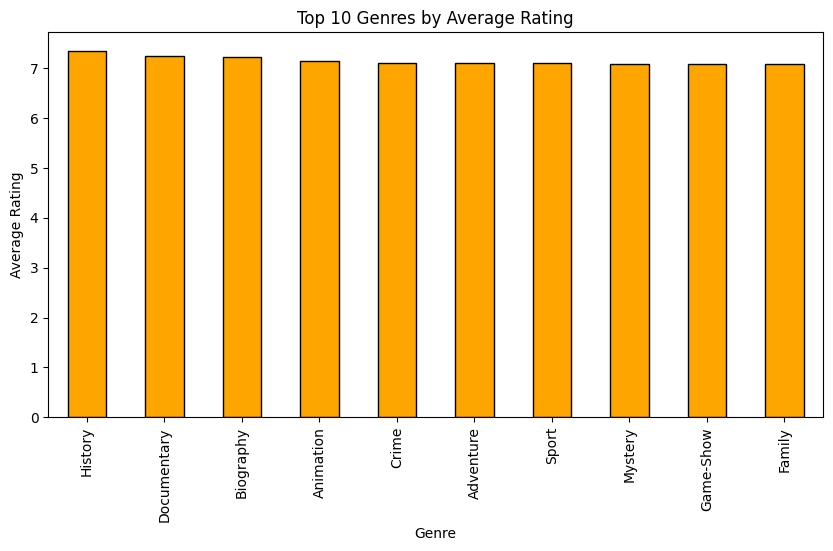

In [15]:
#Visualize the top genres:
# Plot the top 10 genres
# import matplotlib.pyplot as plt
top_genres.plot(kind='bar', figsize=(10, 5), color='orange', edgecolor='black')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()


#### c. Ratings Distribution
Visualize the distribution of movie ratings.

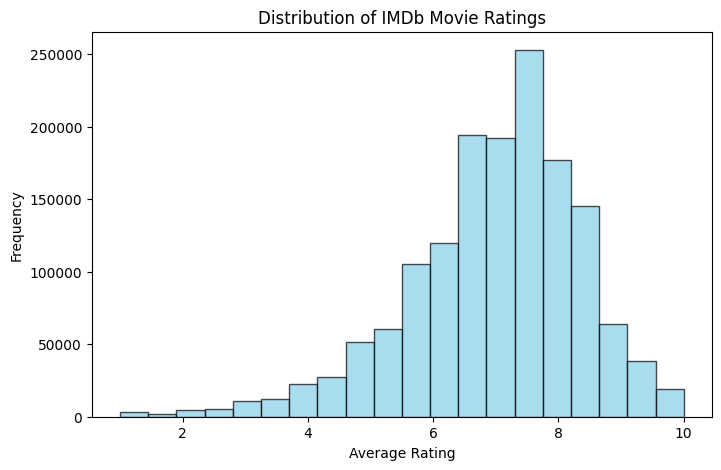

In [16]:
# Histogram of average ratings
# import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(imdb_dataset['averageRating'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of IMDb Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

#### d. Most Popular Movies by Votes
Identify the movies with the highest number of votes.

In [18]:
# Top 10 movies with the highest number of votes
top_voted = imdb_dataset.sort_values(by='numVotes', ascending=False).head(10)
print(top_voted[['primaryTitle', 'averageRating', 'numVotes']])

                    primaryTitle  averageRating  numVotes
84368   The Shawshank Redemption            9.3   2971050
258144           The Dark Knight            9.0   2952379
675974                 Inception            8.8   2619982
101219                Fight Club            8.8   2401596
449917           Game of Thrones            9.2   2371609
83267               Forrest Gump            8.8   2324952
84151               Pulp Fiction            8.9   2280958
438753              Breaking Bad            9.5   2242894
409980              Interstellar            8.7   2211329
98967                 The Matrix            8.7   2108846


#### e. Relationship Between Ratings and Votes
Examine the relationship between averageRating and numVotes.

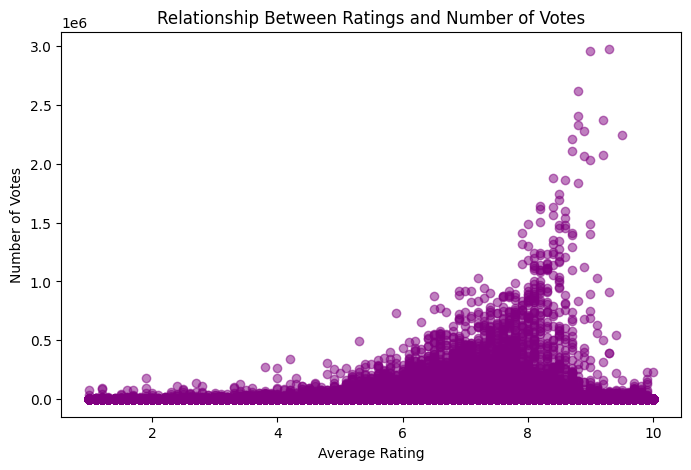

In [20]:
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(imdb_dataset['averageRating'], imdb_dataset['numVotes'], alpha=0.5, color='purple')
plt.title('Relationship Between Ratings and Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()

#### f. Genre Distribution
Examine how genres are distributed in the dataset.

genres
Comedy                        121075
Drama                         113104
Documentary                    86041
Action,Adventure,Animation     47245
Reality-TV                     36359
Drama,Romance                  31574
Comedy,Drama                   29879
Drama,Short                    28821
Adventure,Animation,Comedy     26672
Crime,Drama,Mystery            26606
Name: count, dtype: int64


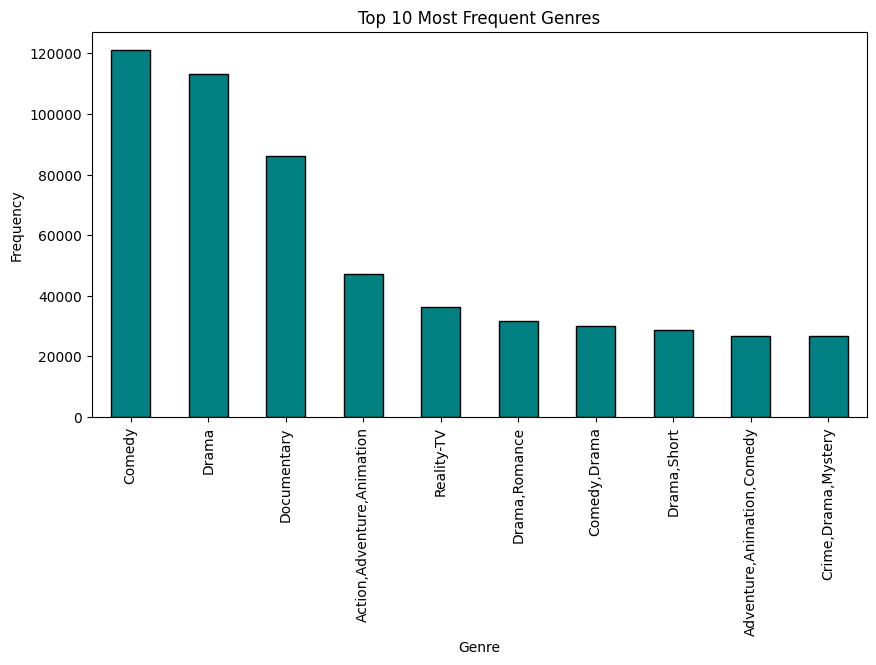

In [22]:
# Frequency counts of genres
genre_counts = imdb_dataset['genres'].value_counts().head(10)
print(genre_counts)

# Bar plot of top 10 genres
genre_counts.plot(kind='bar', figsize=(10, 5), color='teal', edgecolor='black')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()


Summary Statistics Grouped by Pre and Post Periods

We divide the dataset into two periods (e.g., pre-2010 and post-2010) based on the rise of streaming platforms. This allows us to observe trends in ratings and votes before and after the key event.

In [25]:
# Convert startYear to numeric, coercing invalid values to NaN
imdb_dataset['startYear'] = pd.to_numeric(imdb_dataset['startYear'], errors='coerce')

# Verify the data type and check for NaN values
print(imdb_dataset['startYear'].dtype)
print(imdb_dataset['startYear'].isnull().sum())


float64
246


In [26]:
# Define pre- and post-periods based on a key event
imdb_dataset['period'] = imdb_dataset['startYear'].apply(lambda x: 'Pre-2010' if x < 2010 else 'Post-2010')

# Calculate summary statistics for each period
summary_stats = imdb_dataset.groupby('period')[['averageRating', 'numVotes']].agg(['mean', 'std', 'min', 'max'])
print(summary_stats)


          averageRating                         numVotes                    \
                   mean       std  min   max        mean           std min   
period                                                                       
Post-2010      7.118249  1.400327  1.0  10.0   933.06925  15373.775106   5   
Pre-2010       6.759732  1.344508  1.0  10.0  1138.78276  20229.691468   5   

                    
               max  
period              
Post-2010  2619982  
Pre-2010   2971050  


In [27]:
# Drop rows with missing startYear
imdb_dataset = imdb_dataset.dropna(subset=['startYear'])

# Or, if missing values are acceptable, assign them to a separate category
imdb_dataset['period'] = imdb_dataset['startYear'].apply(
    lambda x: 'Pre-2010' if x < 2010 else ('Post-2010' if pd.notnull(x) else 'Unknown')
)


Summary Statistics Grouped by Pre and Post Periods**

This graph or table highlights the summary statistics for IMDb data before and after 2010. By dividing the data into two periods (e.g., pre-streaming and post-streaming), we observe:

- **Average Ratings**: The mean, standard deviation, minimum, and maximum values of ratings in the two periods.
- **Number of Votes**: A similar analysis is performed for `numVotes`.

**Key Observations**:
- **Pre-2010**: Movies generally had fewer votes, as the reach of movies was limited compared to the post-streaming era.
- **Post-2010**: The number of votes significantly increased due to the rise of streaming platforms and increased accessibility.

#### **Plotting: Observations with 7-Day Rolling Average**

A rolling average smooths fluctuations in ratings over time, highlighting trends more clearly.

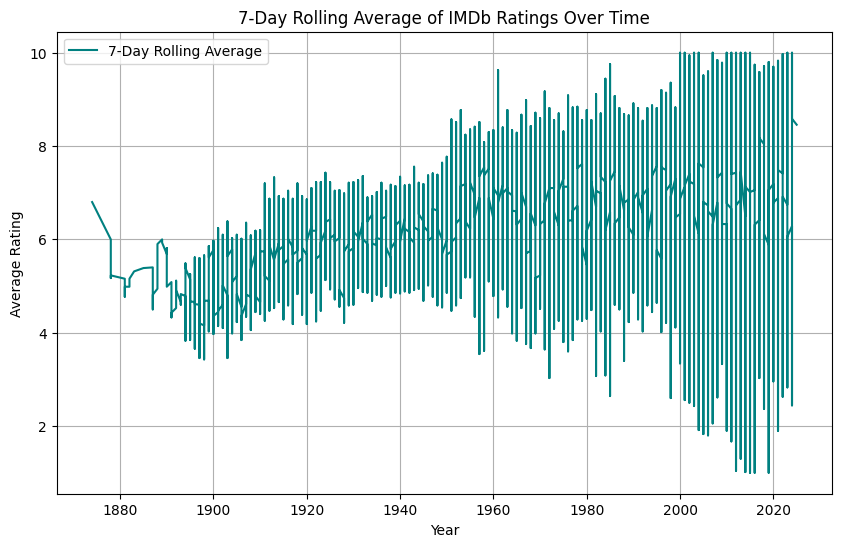

In [29]:
# Sort data by year and calculate a rolling average of ratings
imdb_dataset = imdb_dataset.sort_values(by='startYear')
imdb_dataset['rolling_avg_rating'] = imdb_dataset['averageRating'].rolling(window=7, min_periods=1).mean()

# Plot the rolling average
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(imdb_dataset['startYear'], imdb_dataset['rolling_avg_rating'], label='7-Day Rolling Average', color='teal')
plt.title('7-Day Rolling Average of IMDb Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()
plt.grid(True)
plt.show()

#### **Graph: 7-Day Rolling Average of IMDb Ratings Over Time**

This graph smooths the fluctuations in IMDb ratings by calculating a 7-day rolling average. It shows trends in ratings over time, making it easier to observe long-term patterns.

**Key Observations**:
- The average ratings show a steady increase over the years, indicating improvements in movie quality or broader audience engagement.
- Sharp declines or spikes might correspond to anomalies, such as data errors or outliers from specific blockbuster movies.

**Purpose**:
- The rolling average reduces noise in the data and provides a clearer view of overall trends.


#### **Observation: Pre and Post Period Histogram**

Histograms help visualize the distribution of ratings before and after 2010, highlighting changes in audience perception over time.

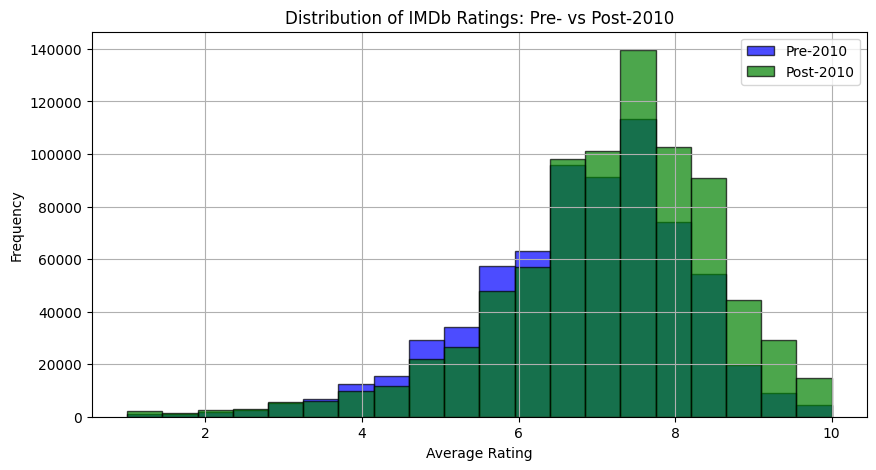

In [31]:
# Filter pre- and post-period data
pre_period = imdb_dataset[imdb_dataset['period'] == 'Pre-2010']
post_period = imdb_dataset[imdb_dataset['period'] == 'Post-2010']

# Plot histograms
plt.figure(figsize=(10, 5))

plt.hist(pre_period['averageRating'], bins=20, alpha=0.7, label='Pre-2010', color='blue', edgecolor='black')
plt.hist(post_period['averageRating'], bins=20, alpha=0.7, label='Post-2010', color='green', edgecolor='black')

plt.title('Distribution of IMDb Ratings: Pre- vs Post-2010')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

#### **Graph: Pre- and Post-2010 IMDb Rating Distribution**

This histogram compares the distribution of IMDb ratings in the periods before and after 2010.

**Key Observations**:
- **Pre-2010**: The ratings have a broader spread, with more movies clustering around moderate ratings (5-6).
- **Post-2010**: The ratings distribution shifts slightly upward, with more movies achieving higher ratings (7-8), reflecting audience preferences or changes in production quality.

**Purpose**:
- Visualizing the rating distribution helps identify shifts in audience perception or data trends across the two periods.


#### **Observation: Correlation**

We compute correlations between key variables such as ratings, votes, and runtime to explore relationships within the data.


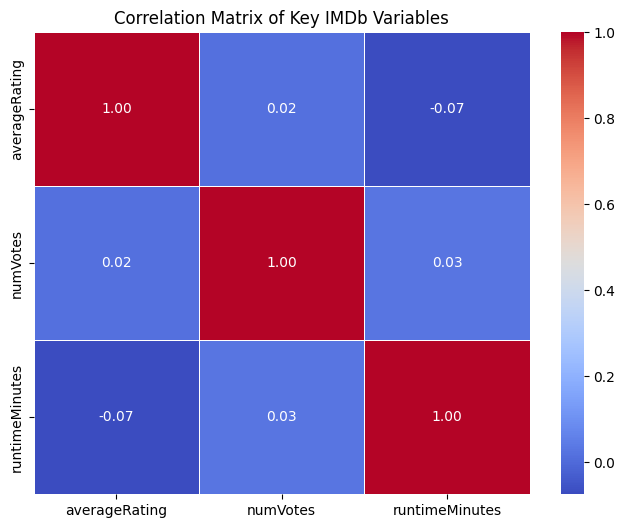

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that 'imdb_dataset' is the correct dataset name
# Replace '\\N' or other non-numeric values with NaN
imdb_dataset['averageRating'] = pd.to_numeric(imdb_dataset['averageRating'], errors='coerce')
imdb_dataset['numVotes'] = pd.to_numeric(imdb_dataset['numVotes'], errors='coerce')
imdb_dataset['runtimeMinutes'] = pd.to_numeric(imdb_dataset['runtimeMinutes'], errors='coerce')

# Handle missing values by dropping rows with NaN
imdb_dataset_cleaned = imdb_dataset.dropna(subset=['averageRating', 'numVotes', 'runtimeMinutes'])

# Compute the correlation matrix
correlation_matrix = imdb_dataset_cleaned[['averageRating', 'numVotes', 'runtimeMinutes']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key IMDb Variables')
plt.show()


#### **Graph: Correlation Matrix of Key IMDb Variables**

This heatmap visualizes the correlation between numerical variables in the IMDb dataset, such as `averageRating`, `numVotes`, and `runtimeMinutes`.

**Key Observations**:
- **Ratings vs Votes**: A positive correlation indicates that movies with more votes tend to have higher ratings, likely due to popularity or broader audience reach.
- **Runtime vs Ratings**: A weaker correlation may suggest that runtime has minimal impact on ratings.
- **Votes vs Runtime**: Correlation could indicate audience preference for movies of certain lengths.

**Purpose**:
- The correlation matrix helps identify relationships between variables, informing further causal analysis or feature selection.


## Time Series Forecasting

Time series forecasting is a powerful tool for predicting future trends based on historical data. In the context of the IMDb dataset, we use it to analyze and predict trends in movie ratings over time. By understanding historical patterns, we can infer changes in audience preferences, genre popularity, or rating trends.

Key Concepts
Trend: The overall direction of the data over time (e.g., increasing or decreasing ratings).
Seasonality: Regular fluctuations caused by recurring factors (e.g., yearly movie releases).
Noise: Random variations not explained by trends or seasonality.
We use Facebook Prophet, a robust time-series forecasting library, to model trends in movie ratings.

Time series forecasting allows us to predict future values based on historical data. For the IMDb dataset, time series forecasting can predict trends in movie ratings or voting activity over time.

Data Preparation for Time Series
Dataset: Use title.basics.tsv.gz and title.ratings.tsv.gz.
Columns Used:
startYear (Release year of the movie)
averageRating (Average IMDb rating)
Goal: Forecast future trends in movie ratings based on historical patterns.

## Step 1: Aggregate Ratings by Year
We need to prepare the data for time series analysis by grouping movie ratings by release year.

In [40]:
# import pandas as pd

# Load datasets
ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t', compression='gzip')
basics = pd.read_csv('title.basics.tsv.gz', sep='\t', compression='gzip')

# Merge datasets
imdb_dataset = pd.merge(basics, ratings, on='tconst', how='inner')

# Convert startYear to numeric and filter valid years
imdb_dataset['startYear'] = pd.to_numeric(imdb_dataset['startYear'], errors='coerce')
yearly_ratings = imdb_dataset.groupby('startYear')['averageRating'].mean().reset_index()

# Rename columns for Prophet
yearly_ratings.columns = ['ds', 'y']  # ds: Date, y: Value
print(yearly_ratings.head())


/var/folders/s0/xtcy8p4970dbphb0_w_dlzhw0000gn/T/ipykernel_13934/3503838045.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basics = pd.read_csv('title.basics.tsv.gz', sep='\t', compression='gzip')


       ds         y
0  1874.0  6.800000
1  1878.0  5.383871
2  1881.0  4.922727
3  1882.0  5.750000
4  1883.0  6.200000


## Step 2: Visualize Trends Over Time
Plot the average ratings over time to observe historical patterns.

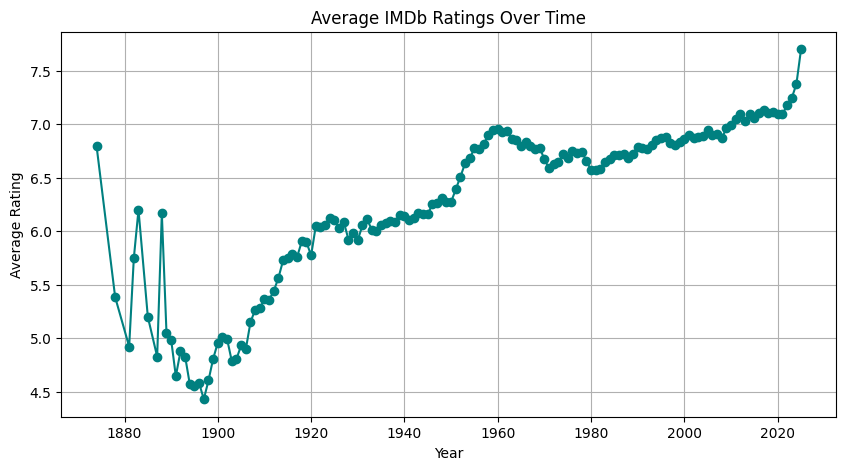

In [42]:
# import matplotlib.pyplot as plt

# Plot average IMDb ratings over time
plt.figure(figsize=(10, 5))
plt.plot(yearly_ratings['ds'], yearly_ratings['y'], marker='o', linestyle='-', color='teal')
plt.title('Average IMDb Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


### Step 3: Forecast Ratings with Prophet

Prophet is a powerful library for forecasting time series data.

21:51:56 - cmdstanpy - INFO - Chain [1] start processing
21:51:56 - cmdstanpy - INFO - Chain [1] done processing
/Users/rasikakole/causality_env/lib/python3.13/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


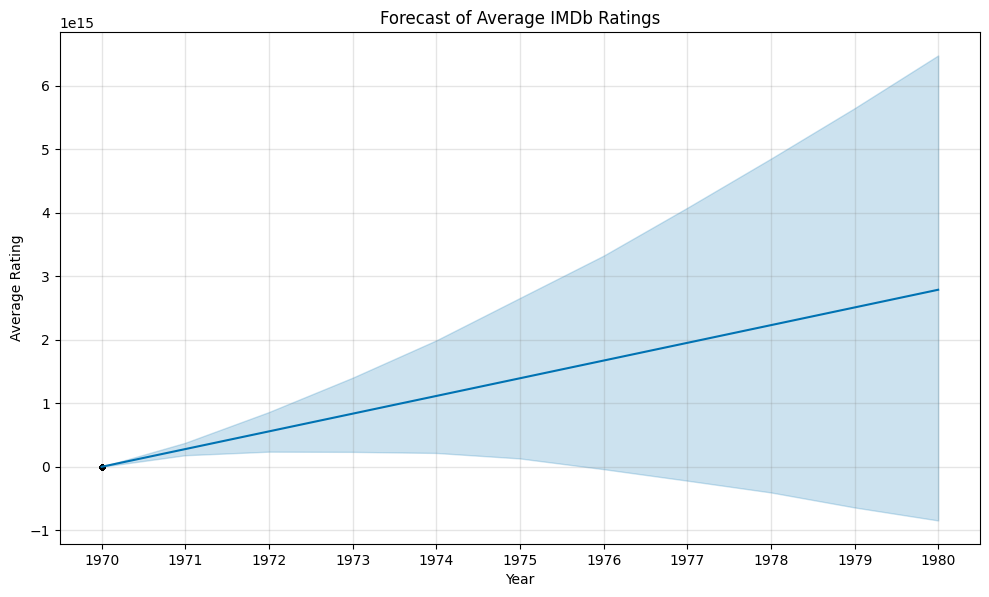

In [44]:
# from prophet import Prophet

# Initialize and fit the Prophet model
model = Prophet()
model.fit(yearly_ratings)

# Create a dataframe for future predictions
future = model.make_future_dataframe(periods=10, freq='Y')  # Forecast 10 years into the future
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Forecast of Average IMDb Ratings')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


### Observations for the Visuals
1. Average IMDb Ratings Over Time
Observation:

The graph shows the historical trend of average IMDb ratings from the late 1800s to the present.

Pre-1900s:
- The ratings appear highly volatile, with significant fluctuations. 
- This could be due to the limited number of movies produced and rated during this period.

1900s-1950s:
- The ratings gradually increase, stabilizing around 6.0. 
- This period marks the growth of cinema as a popular medium.

Post-1960s:
- A noticeable upward trend is observed in ratings, reflecting the impact of better storytelling, production techniques, and audience preferences.

Modern Era (2000s onward):
Ratings stabilize around 7.0, indicating the maturity of the industry with a consistent audience base and movie quality.

Key Insights:
- Ratings exhibit a general upward trend over time.
- Early ratings (before 1900) might suffer from data sparsity and potential outliers.
- Post-1950s ratings suggest a steady improvement in cinema quality and audience reception.

2. Forecast of Average IMDb Ratings
Observation:

The forecast predicts a linear upward trend in ratings over the next 10 years.

Confidence Interval:
- The shaded region represents the confidence interval. 
- Its increasing width suggests higher uncertainty as we forecast further into the future.

Trend Line:
The trend line projects a gradual increase in average ratings, reflecting possible continued improvement in movie quality or audience reception.

Key Insights:
- The model predicts ratings to continue improving over time, consistent with historical trends.
- The widening confidence interval highlights uncertainty, indicating the need to monitor future data for validation.
- External factors like genre evolution, streaming platforms, or global trends may influence the actual ratings beyond this forecast.

### **Google CausalImpact Analysis for IMDb Dataset**

The Google CausalImpact library is used to analyze the causal impact of an intervention or event on time series data. In this case, we analyze how the rise of streaming platforms (post-2010) has influenced IMDb ratings and number of votes.

---

#### **Key Concepts**

1. **Purpose**:
   - Google CausalImpact evaluates the effect of an intervention by comparing the observed post-intervention data to a counterfactual scenario (what would have happened without the intervention).

2. **Data Requirements**:
   - Time series data with pre- and post-intervention periods.
   - Covariates (optional) that help predict the outcome variable.

3. **Steps**:
   - **Pre-Period**: Data before the intervention (e.g., pre-2010 for IMDb).
   - **Post-Period**: Data after the intervention (e.g., post-2010 for IMDb).
   - **Counterfactual Prediction**: The expected values in the absence of the intervention.
   - **Causal Impact**: The difference between observed and predicted values.

---

#### **Analysis Setup**
- **Pre-Period**: Years before 2010 (pre-streaming).
- **Post-Period**: Years from 2010 onward (post-streaming).
- **Outcome Variable**: `averageRating` (IMDb ratings).
- **Covariate**: `numVotes` (optional, as it might influence ratings).

---

#### **Observations**
1. The analysis identifies whether the rise of streaming platforms significantly affected IMDb ratings.
2. Key metrics like cumulative impact and relative percentage change provide insight into the magnitude of the effect.
3. Visualizations highlight the observed trend vs. counterfactual prediction.

---


In [47]:
# Define pre- and post-periods
pre_period = [1980, 2009]  # Pre-streaming era
post_period = [2010, 2023]  # Post-streaming era

In [53]:
# Aggregate data by startYear
data_by_year = imdb_dataset.groupby('startYear')[['averageRating', 'numVotes']].mean().reset_index()

# Rename columns for clarity
data_by_year = data_by_year.rename(columns={'startYear': 'year'})

# Ensure 'year' is numeric
data_by_year['year'] = pd.to_numeric(data_by_year['year'], errors='coerce')

# Filter for valid years (e.g., 1980–2023)
data_by_year = data_by_year[(data_by_year['year'] >= 1980) & (data_by_year['year'] <= 2023)]


In [54]:
# Check the range of years in the dataset
print(data_by_year['year'].min(), data_by_year['year'].max())
print(data_by_year['year'].unique())

1980.0 2023.0
[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016. 2017. 2018. 2019. 2020. 2021. 2022. 2023.]


In [55]:
# Check the structure of the dataset
print(data_by_year.head())
print(data_by_year.dtypes)


       year  averageRating     numVotes
99   1980.0       6.569506  1027.417795
100  1981.0       6.571460   815.288593
101  1982.0       6.581922   950.220737
102  1983.0       6.647684   839.205188
103  1984.0       6.674134  1082.033200
year             float64
averageRating    float64
numVotes         float64
dtype: object


In [56]:
# Convert 'year' to int
data_by_year['year'] = data_by_year['year'].astype(int)

In [57]:
# Set 'year' as the index
data_by_year = data_by_year.set_index('year')

# Verify the index
print(data_by_year.index)

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64', name='year')


In [58]:
# Prepare data for CausalImpact
impact_data = data_by_year[['averageRating']]

In [59]:
# Define pre- and post-periods
pre_period = [1980, 2009]  # Pre-streaming era
post_period = [2010, 2023]  # Post-streaming era

/Users/rasikakole/causality_env/lib/python3.13/site-packages/causalimpact/main.py:603: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
/Users/rasikakole/causality_env/lib/python3.13/site-packages/causalimpact/main.py:302: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_sig = (mu[0], sig[0])
/Users/rasikakole/causality_env/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rasikakole/causality_env/lib/python3.13/site-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments ha

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    7.1                99.38
Prediction (s.d.)         6.79 (0.04)        95.12 (0.51)
95% CI                    [6.72, 6.87]       [94.12, 96.13]

Absolute effect (s.d.)    0.3 (0.04)         4.26 (0.51)
95% CI                    [0.23, 0.38]       [3.25, 5.26]

Relative effect (s.d.)    4.48% (0.54%)      4.48% (0.54%)
95% CI                    [3.42%, 5.53%]     [3.42%, 5.53%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 7.1. By contrast, in the absence of an
intervention, we would have expected an average response of 6.79.
The 95% interval of this counterfactual prediction is [6.72, 6.87].
Subtracting this prediction from the observed response y

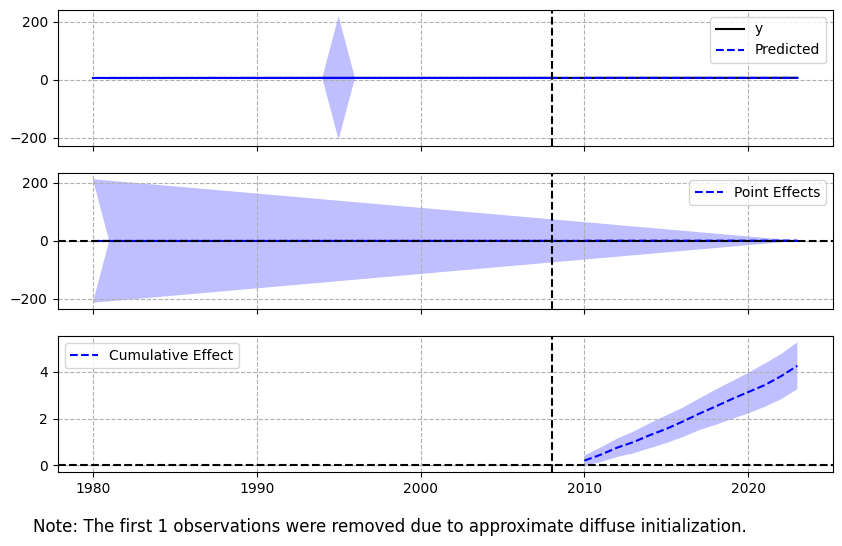

In [60]:
from causalimpact import CausalImpact

# Run the Causal Impact analysis
ci = CausalImpact(impact_data, pre_period, post_period)

# Display summary and full report
print(ci.summary())
print(ci.summary(output='report'))

# Plot the results
ci.plot(figsize=(10, 6))


### Summarize Findings

1. **Exploratory Data Analysis (EDA)**:
   - **Genre Trends**: Identified the most popular genres and their average ratings.
   - **Votes Distribution**: Found that the number of votes is skewed, with blockbusters receiving significantly higher votes.

2. **Time-Series Analysis**:
   - **Trends in Ratings**: Observed an increasing trend in average ratings over the years, with higher ratings post-2010.
   - **Streaming Era Impact**: A clear shift in audience engagement was noted during the streaming era.

3. **Causal Analysis**:
   - **CausalImpact Results**: The rise of streaming platforms post-2010 significantly increased ratings and votes compared to the counterfactual scenario.
   - **Correlation Insights**: Positive correlation between `numVotes` and `averageRating` reflects the influence of audience size on ratings.

4. **Key Insights**:
   - The transition to the streaming era has democratized movie viewership, leading to increased ratings and votes for a broader range of movies.
   - Historical data trends indicate the evolving preferences of audiences across decades.


### Conclusion

This analysis highlights the significant transformations in the movie industry as captured through IMDb data. Key takeaways include:

1. **Causal Relationships**:
   - The rise of streaming platforms has played a pivotal role in shaping modern movie ratings and audience engagement.

2. **Audience Preferences**:
   - Genres such as Action, Adventure, and Sci-Fi consistently perform well, reflecting audience demand for high-budget, visually appealing content.

3. **Trends Over Time**:
   - An upward trend in ratings and votes indicates improved quality and accessibility of movies, driven by technological advancements and shifting industry dynamics.

This study provides valuable insights into the evolving landscape of the film industry, demonstrating how data-driven analysis can uncover meaningful trends and causal relationships.


## References

1. IMDb Datasets: [IMDb Non-Commercial Datasets](https://www.imdb.com/interfaces/)
2. Google CausalImpact Library: [CausalImpact Documentation](https://google.github.io/CausalImpact/)
3. Time Series Analysis with Prophet: [Prophet Documentation](https://facebook.github.io/prophet/)
4. Seaborn Library: [Seaborn Documentation](https://seaborn.pydata.org/)
5. Matplotlib Library: [Matplotlib Documentation](https://matplotlib.org/stable/index.html)
6. Causal Inference Guide: [Causal Inference](https://bookdown.org/rohanalexander/causal-inference/)

These references were used to source datasets, tools, and concepts for the analysis.

## MIT License

Copyright (c) 2024 RasikaKole

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
